In [5]:
import numpy as np
import matplotlib.pyplot as plt

    
from retrieval_base.retrieval import pre_processing, Retrieval
from retrieval_base.config import Config
import config_freechem as conf


path = '/home/dario/phd/retrieval_base/'

config_file = 'config_freechem.txt'
target = 'J1200'
run = 'rev_2' # important to set this to the correct run 


conf = Config(path=path, target=target, run=run)(config_file)

In [10]:
import pickle
import pathlib
data_path = pathlib.Path(path) / target / 'retrieval_outputs' / run / 'test_data'
d_spec = pickle.load(open(data_path / 'd_spec_K2166.pkl', 'rb'))
m_spec = pickle.load(open(data_path / 'bestfit_m_spec_K2166.pkl', 'rb'))

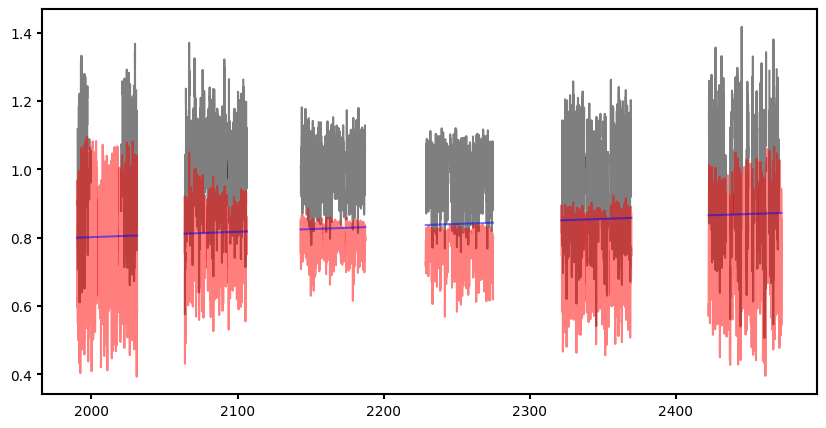

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
def veiling_power_law(wave, r, alpha, wave_0=None):
    """ wavelength and wave_0 in same units
    r is the veiling at wave_0
    alpha is the power law index
    """
    wave_0  = wave.min() if wave_0 is None else wave_0
    return r * (wave/wave_0)**alpha
n_orders, n_dets, _ = d_spec.flux.shape
wave_min = d_spec.wave.min()
for order in range(n_orders):
    for det in range(n_dets):
        ax.plot(d_spec.wave[order, det], d_spec.flux[order, det], 'k', alpha=0.5)
        ax.plot(d_spec.wave[order,det], m_spec.flux[order, det]*0.8, 'r', alpha=0.5)
        ax.plot(d_spec.wave[order,det], veiling_power_law(d_spec.wave[order,det], 0.8, 0.4, wave_0=wave_min), 'b', alpha=0.5)
